In [48]:
import numpy as np
import matplotlib.pyplot as plt
import paths
import cartopy.crs as ccrs
from PIL import Image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from astropy.io import fits
import config

In [61]:
def make_gif_map(bestparamgrid, inc, period, savedir, cmap="plasma", step=15, fps=4):
    fig = plt.figure(figsize=(10,5))
    y, x = bestparamgrid.shape

    # create an interpolation smoothed map
    plt.imshow(bestparamgrid, interpolation='bicubic', cmap='gray', aspect=x/y*0.5)
    plt.axis('off')
    fig.patch.set_visible(False)
    plt.savefig(paths.figures / f"{savedir}/solver1_interpmap.png", bbox_inches='tight', dpi=200, pad_inches=0)
    img = Image.open(paths.figures / f"{savedir}/solver1_interpmap.png")
    img = np.array(img.convert('L'), dtype='float64')
    img[img == 255.] = np.nan
    img /= 255.

    # make GIF with PIL
    Nlat, Nlon = img.shape
    Lon, Lat = np.meshgrid(np.linspace(-180, 180, Nlon), np.linspace(-90, 90, Nlat))

    num_frames = int(360/step)
    fig = plt.figure(figsize=(4, 4))
    ax = plt.axes(projection=ccrs.Orthographic(0, 10))
    time_text = ax.text(0.85, 0.05,'', transform=ax.transAxes)
    cmap = plt.cm.get_cmap(cmap).copy()
    cmap.set_bad(color="grey", alpha=1.0)

    def update(frame):
        ax = plt.axes(projection=ccrs.Orthographic(frame*step, 90-inc))
        gl = ax.gridlines(xlocs=range(-180, 180, 30), ylocs=range(-90, 90, 30), color='gray', linewidth=0.3)
        im = ax.imshow(img, origin="lower", extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(), cmap=cmap, vmin=0., vmax=1.0)
        time_text.set_text(f'{frame*period/num_frames+0.2:.1f}h')
        for item in ax.spines.values():
            item.set_linewidth(1.5)
        return (ax, gl, im, time_text)

    # Create the animation
    ani = FuncAnimation(plt.gcf(), update, frames=num_frames)

    # Save the animation as a GIF
    output_gif_path = paths.figures / f"{savedir}/solver1_map.gif"
    ani.save(output_gif_path, dpi=100, fps=fps, savefig_kwargs={'transparent': True, 'facecolor': 'none'})

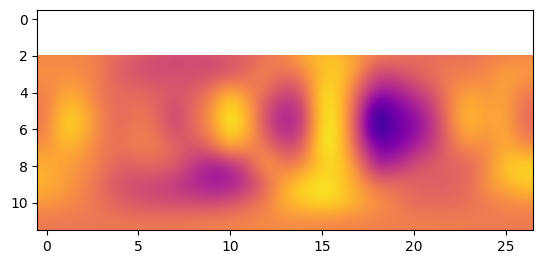

In [63]:
target = "W1049B"
savedir = f"IGRINS_HK_{target}"
inc = config.incs[target]
period = config.periods[target]
bestparamgrid = fits.getdata(paths.figures/f"{savedir}/mecator.fits")
plt.imshow(bestparamgrid, interpolation='bicubic', cmap=plt.cm.plasma);

/var/folders/jm/dmx123p56254c5gy18wgtyh00000gn/T/ipykernel_87662/1590420524.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap).copy()
MovieWriter ffmpeg unavailable; using Pillow instead.


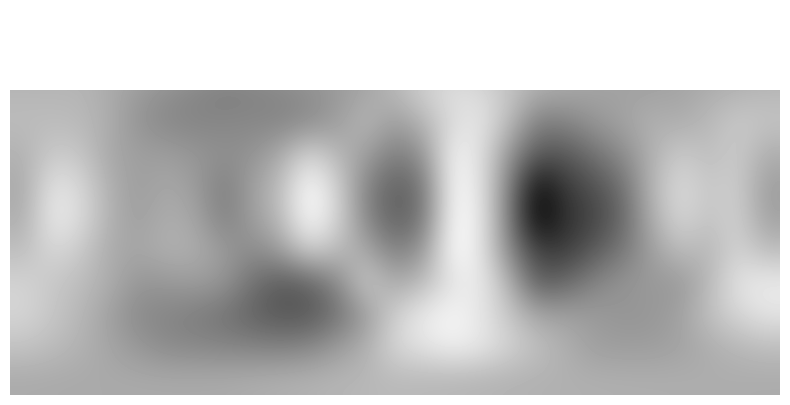

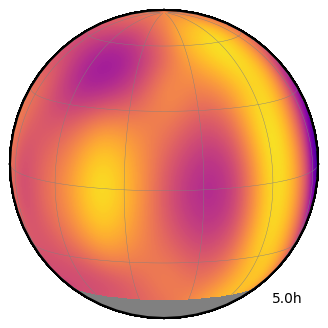

In [64]:
make_gif_map(bestparamgrid, inc, period, savedir)